In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


exploring the training dataset

In [2]:
# Load the training data
train_df = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')

# Display the first few rows to get a sense of the data
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


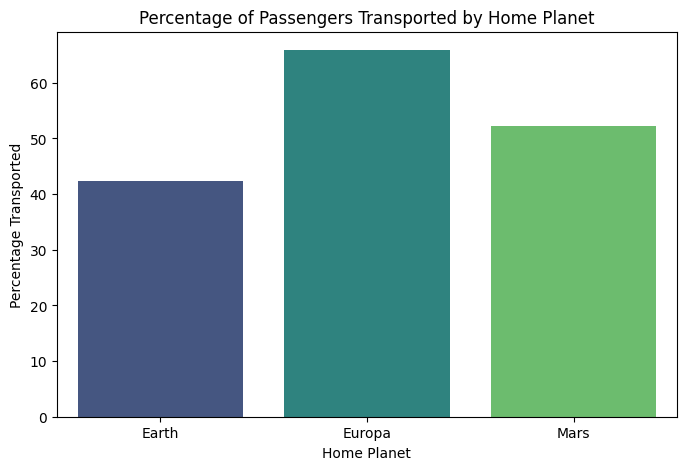

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by HomePlanet and calculate the percentage of transported passengers
homeplanet_transport = train_df.groupby('HomePlanet')['Transported'].mean() * 100

# Plotting the results
plt.figure(figsize=(8, 5))
sns.barplot(x=homeplanet_transport.index, y=homeplanet_transport.values, palette="viridis")
plt.title('Percentage of Passengers Transported by Home Planet')
plt.xlabel('Home Planet')
plt.ylabel('Percentage Transported')
plt.show()


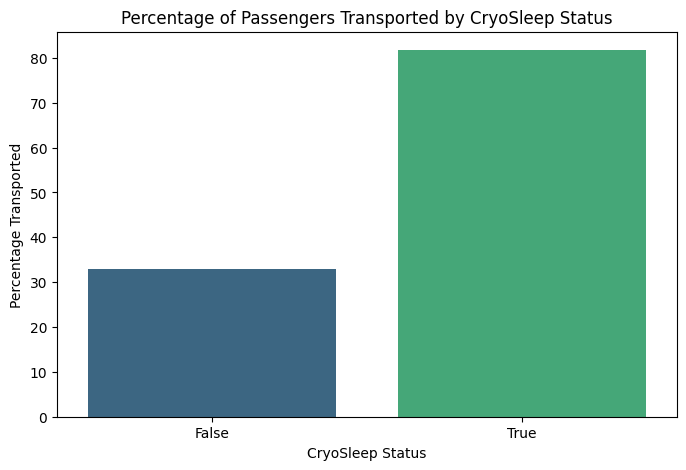

In [4]:
# Group data by CryoSleep and calculate the percentage of transported passengers
cryosleep_transport = train_df.groupby('CryoSleep')['Transported'].mean() * 100

# Plotting the results
plt.figure(figsize=(8, 5))
sns.barplot(x=cryosleep_transport.index, y=cryosleep_transport.values, palette="viridis")
plt.title('Percentage of Passengers Transported by CryoSleep Status')
plt.xlabel('CryoSleep Status')
plt.ylabel('Percentage Transported')
plt.show()


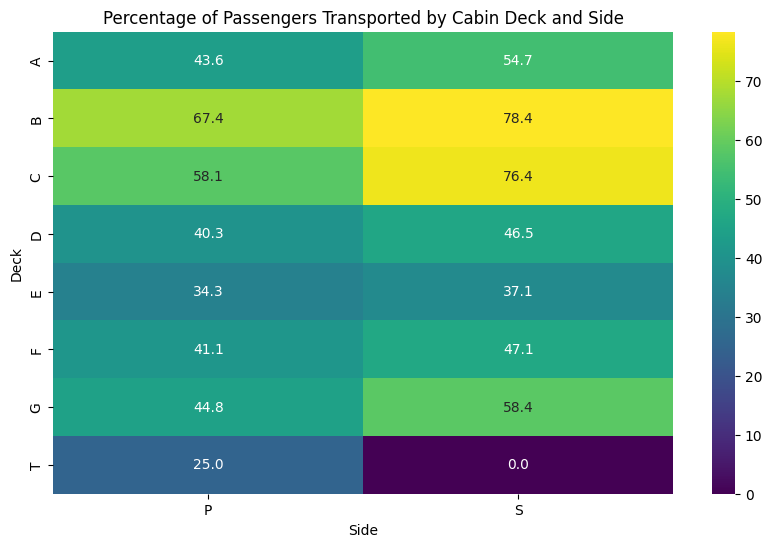

In [5]:
# Splitting the Cabin into Deck and Side for analysis
train_df['Deck'] = train_df['Cabin'].apply(lambda x: x.split('/')[0] if pd.notnull(x) else None)
train_df['Side'] = train_df['Cabin'].apply(lambda x: x.split('/')[2] if pd.notnull(x) else None)

# Group data by Deck and Side to calculate the mean transported rate
cabin_transport = train_df.groupby(['Deck', 'Side'])['Transported'].mean().unstack() * 100

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cabin_transport, annot=True, cmap="viridis", fmt=".1f")
plt.title('Percentage of Passengers Transported by Cabin Deck and Side')
plt.xlabel('Side')
plt.ylabel('Deck')
plt.show()


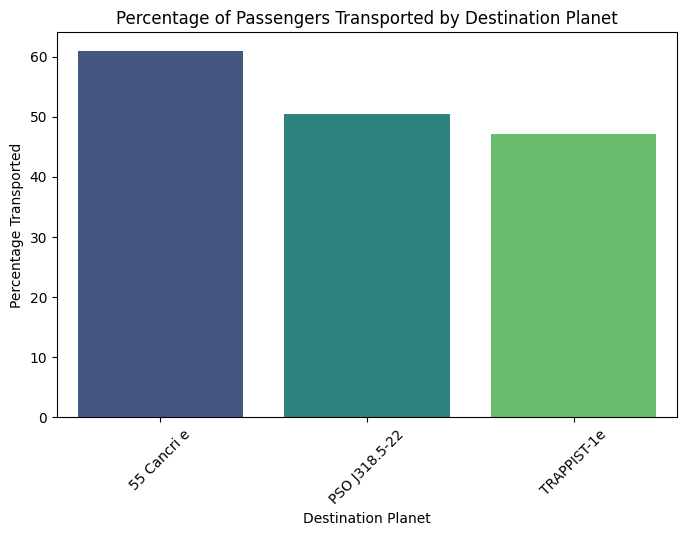

In [6]:
# Group data by Destination and calculate the percentage of transported passengers
destination_transport = train_df.groupby('Destination')['Transported'].mean() * 100

# Plotting the results
plt.figure(figsize=(8, 5))
sns.barplot(x=destination_transport.index, y=destination_transport.values, palette="viridis")
plt.title('Percentage of Passengers Transported by Destination Planet')
plt.xlabel('Destination Planet')
plt.ylabel('Percentage Transported')
plt.xticks(rotation=45)
plt.show()


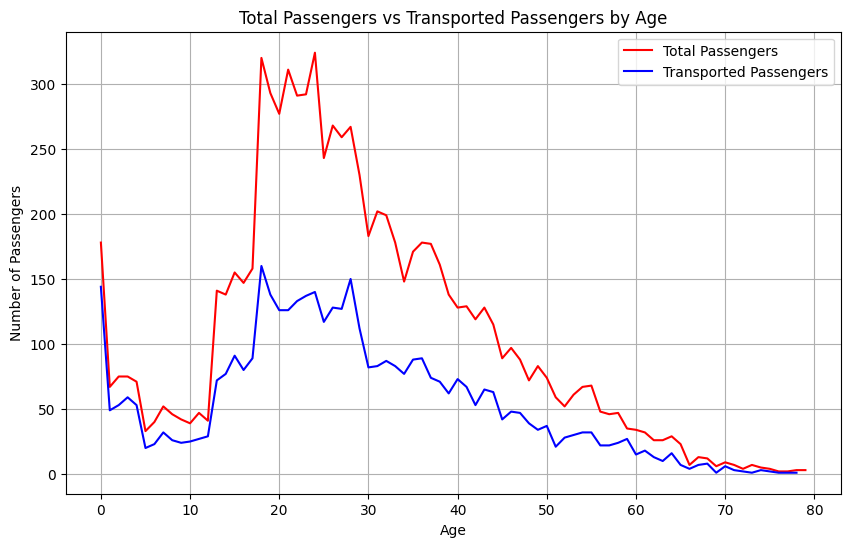

In [7]:
# Count the total number of passengers at each age
age_total = train_df['Age'].value_counts().sort_index()

# Calculate the number of transported passengers at each age
age_transport = train_df[train_df['Transported'] == True]['Age'].value_counts().sort_index()

# Plotting the overlaying graphs
plt.figure(figsize=(10, 6))

# Plot total passengers by age (red line)
plt.plot(age_total.index, age_total.values, color='red', label='Total Passengers')

# Plot transported passengers by age (blue line)
plt.plot(age_transport.index, age_transport.values, color='blue', label='Transported Passengers')

# Adding labels and title
plt.title('Total Passengers vs Transported Passengers by Age')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.legend()

plt.grid(True)
plt.show()



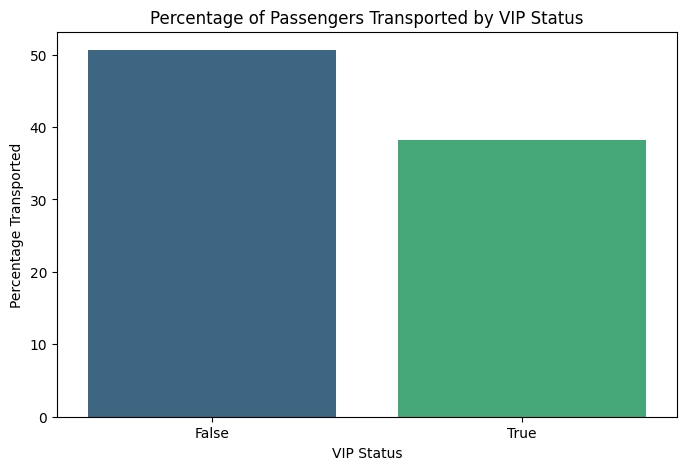

In [8]:
# Group data by VIP status and calculate the percentage of transported passengers
vip_transport = train_df.groupby('VIP')['Transported'].mean() * 100

# Plotting the results
plt.figure(figsize=(8, 5))
sns.barplot(x=vip_transport.index, y=vip_transport.values, palette="viridis")
plt.title('Percentage of Passengers Transported by VIP Status')
plt.xlabel('VIP Status')
plt.ylabel('Percentage Transported')
plt.show()


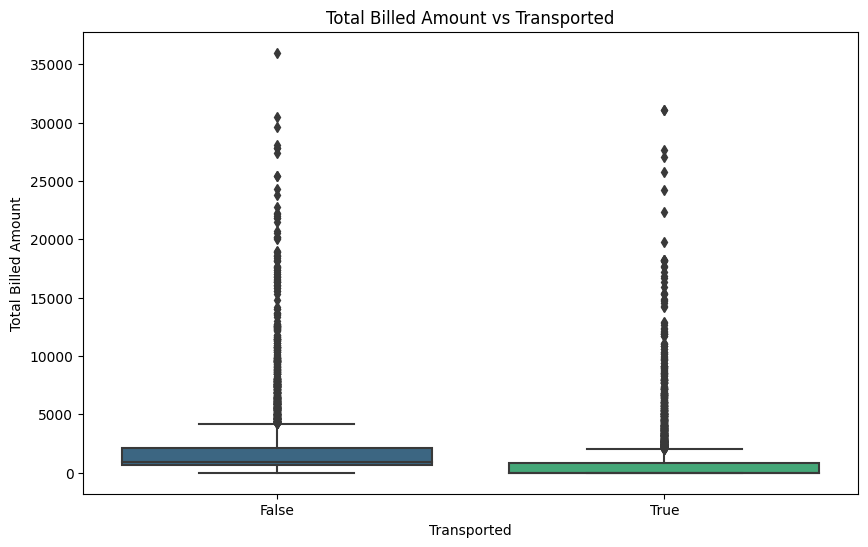

In [9]:
# Calculate total billed amount for each passenger
train_df['TotalBilled'] = train_df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

# Plotting the results
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transported', y='TotalBilled', data=train_df, palette="viridis")
plt.title('Total Billed Amount vs Transported')
plt.xlabel('Transported')
plt.ylabel('Total Billed Amount')
plt.show()


<Figure size 1000x600 with 0 Axes>

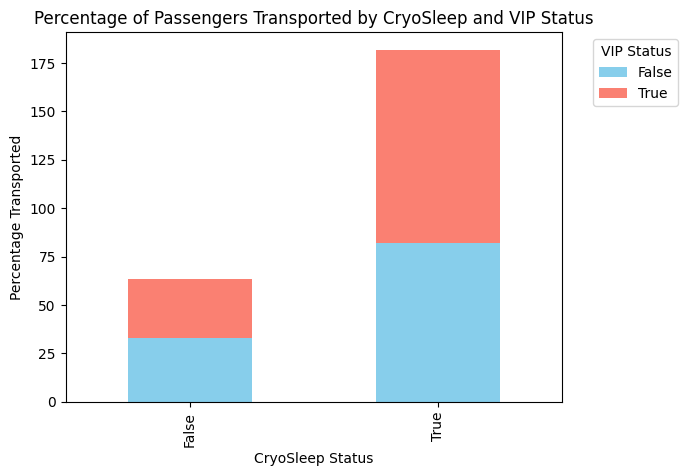

In [10]:
# Group the data by CryoSleep and VIP status and calculate the percentage of transported passengers
cryo_vip_transport = train_df.groupby(['CryoSleep', 'VIP'])['Transported'].mean().unstack() * 100

# Plotting the grouped bar chart
plt.figure(figsize=(10, 6))
cryo_vip_transport.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])

# Adding labels and title
plt.title('Percentage of Passengers Transported by CryoSleep and VIP Status')
plt.xlabel('CryoSleep Status')
plt.ylabel('Percentage Transported')
plt.legend(title='VIP Status', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


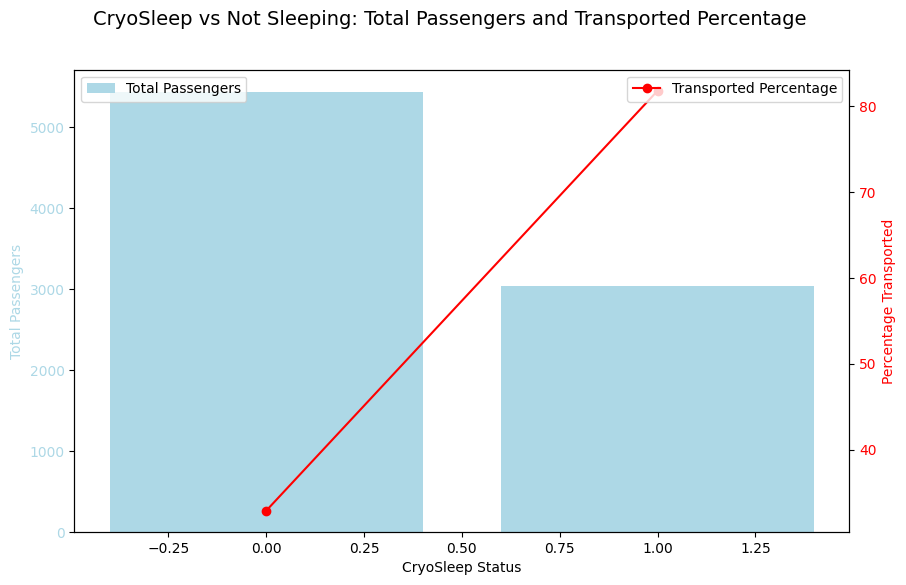

In [11]:
# Calculate total number of passengers in each CryoSleep category
cryo_counts = train_df['CryoSleep'].value_counts()

# Calculate the percentage of passengers transported in each CryoSleep category
cryo_transport_rate = train_df.groupby('CryoSleep')['Transported'].mean() * 100

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the total number of passengers as bars (left y-axis)
ax1.bar(cryo_counts.index, cryo_counts.values, color='lightblue', label='Total Passengers')
ax1.set_xlabel('CryoSleep Status')
ax1.set_ylabel('Total Passengers', color='lightblue')
ax1.tick_params(axis='y', labelcolor='lightblue')

# Create a second y-axis to plot the transport rate
ax2 = ax1.twinx()
ax2.plot(cryo_transport_rate.index, cryo_transport_rate.values, color='red', marker='o', label='Transported Percentage')
ax2.set_ylabel('Percentage Transported', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adding title and legends
fig.suptitle('CryoSleep vs Not Sleeping: Total Passengers and Transported Percentage', fontsize=14)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


<Figure size 1000x600 with 0 Axes>

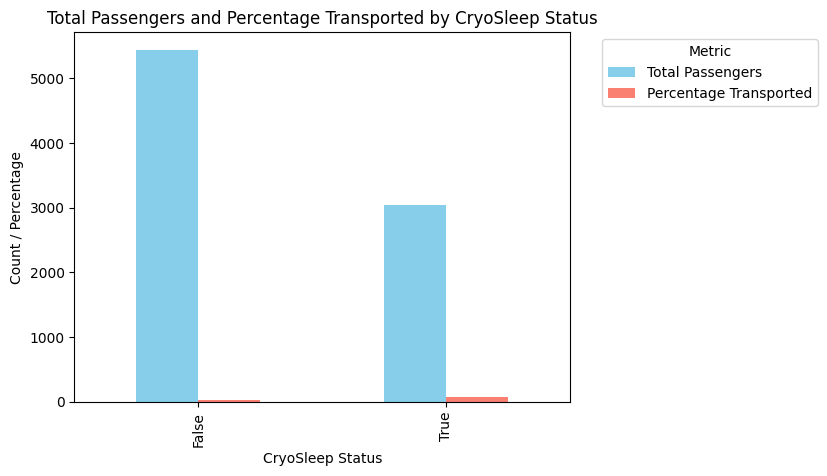

In [12]:
# Group the data by CryoSleep status and calculate the percentage of transported passengers
cryo_transport = train_df.groupby(['CryoSleep'])['Transported'].mean() * 100

# Count the total number of passengers for each CryoSleep status
cryo_counts = train_df['CryoSleep'].value_counts()

# Combine the two into a DataFrame for easy plotting
cryo_df = pd.DataFrame({'Total Passengers': cryo_counts, 'Percentage Transported': cryo_transport})

# Plotting the grouped bar chart
plt.figure(figsize=(10, 6))
cryo_df.plot(kind='bar', stacked=False, color=['skyblue', 'salmon'])

# Adding labels and title
plt.title('Total Passengers and Percentage Transported by CryoSleep Status')
plt.xlabel('CryoSleep Status')
plt.ylabel('Count / Percentage')
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


In [13]:

# Load the training data
train_df = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')

# Group the data by CryoSleep status and calculate the percentage of transported passengers
cryo_transport = train_df.groupby(['CryoSleep'])['Transported'].mean() * 100

# Count the total number of passengers for each CryoSleep status
cryo_counts = train_df['CryoSleep'].value_counts()

# Combine the two into a DataFrame for easy comparison
cryo_df = pd.DataFrame({
    'Total Passengers': cryo_counts,
    'Percentage Transported': cryo_transport
})

# Display the DataFrame
print(cryo_df)

           Total Passengers  Percentage Transported
CryoSleep                                          
False                  5439               32.892076
True                   3037               81.758314


In [14]:
import pandas as pd

# Load the training data
train_df = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')

# Split the Cabin into Deck and Side
train_df['Deck'] = train_df['Cabin'].apply(lambda x: x.split('/')[0] if pd.notnull(x) else None)
train_df['Side'] = train_df['Cabin'].apply(lambda x: x.split('/')[2] if pd.notnull(x) else None)

# Create a pivot table to show the percentage of passengers transported by CryoSleep, Deck, and Side
cryo_deck_side_transport = train_df.pivot_table(index=['Deck', 'Side'], 
                                                columns='CryoSleep', 
                                                values='Transported', 
                                                aggfunc='mean') * 100

# Display the pivot table
print(cryo_deck_side_transport)


CryoSleep      False       True 
Deck Side                       
A    P     25.882353   96.551724
     S     38.144330   92.307692
B    P     33.540373   98.369565
     S     50.000000  100.000000
C    P     31.683168   98.461538
     S     59.210526  100.000000
D    P     26.666667   97.826087
     S     28.994083  100.000000
E    P     28.739003   61.333333
     S     28.530259   67.741935
F    P     26.744186   98.924731
     S     33.837429   98.154982
G    P     28.042328   59.379616
     S     41.968912   72.511144
T    P     25.000000         NaN


In [15]:
import pandas as pd

# Load the training data
train_df = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')

# Calculate total spending for each passenger
train_df['TotalSpending'] = train_df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

# Group by CryoSleep status and calculate the average spending
average_spending = train_df.groupby('CryoSleep')['TotalSpending'].mean()

# Display the average spending based on CryoSleep status
print("Average Spending by CryoSleep Status:")
print(average_spending)

# Group by CryoSleep and Transported status to compare spending
spending_transport = train_df.groupby(['CryoSleep', 'Transported'])['TotalSpending'].mean().unstack()

# Display the spending habits for transported vs non-transported passengers by CryoSleep status
print("\nSpending Habits by CryoSleep and Transported Status:")
print(spending_transport)


Average Spending by CryoSleep Status:
CryoSleep
False    2248.299687
True        0.000000
Name: TotalSpending, dtype: float64

Spending Habits by CryoSleep and Transported Status:
Transported        False        True 
CryoSleep                            
False        2311.723288  2118.899944
True            0.000000     0.000000


In [16]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder


In [17]:
# Load the data
train_df = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

# Fill missing values
train_df['CryoSleep'].fillna(False, inplace=True)  # Assuming missing values mean not in CryoSleep
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['VIP'].fillna(False, inplace=True)
train_df['RoomService'].fillna(0, inplace=True)
train_df['FoodCourt'].fillna(0, inplace=True)
train_df['ShoppingMall'].fillna(0, inplace=True)
train_df['Spa'].fillna(0, inplace=True)
train_df['VRDeck'].fillna(0, inplace=True)
train_df['HomePlanet'].fillna('Unknown', inplace=True)
train_df['Destination'].fillna('Unknown', inplace=True)
train_df['Cabin'].fillna('Unknown/0/Unknown', inplace=True)

# Feature Engineering
train_df['Deck'] = train_df['Cabin'].apply(lambda x: x.split('/')[0])
train_df['Side'] = train_df['Cabin'].apply(lambda x: x.split('/')[2])
train_df['TotalSpending'] = train_df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

# Label Encoding for categorical variables
le = LabelEncoder()
train_df['HomePlanet'] = le.fit_transform(train_df['HomePlanet'])
train_df['Destination'] = le.fit_transform(train_df['Destination'])
train_df['Deck'] = le.fit_transform(train_df['Deck'])
train_df['Side'] = le.fit_transform(train_df['Side'])

# Selecting features and target
features = ['HomePlanet', 'CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 
            'ShoppingMall', 'Spa', 'VRDeck', 'Deck', 'Side', 'TotalSpending']
target = 'Transported'

X = train_df[features]
y = train_df[target]

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


/tmp/ipykernel_18/2387249837.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['CryoSleep'].fillna(False, inplace=True)  # Assuming missing values mean not in CryoSleep
/tmp/ipykernel_18/2387249837.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['CryoSleep'].fillna(False, inplace=True)  

In [18]:


# Load the training data
train_df = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')

# Fill missing values in spending columns with 0 (assuming no spending if missing)
spending_columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
train_df[spending_columns] = train_df[spending_columns].fillna(0)

# Calculate the average spending for transported vs. non-transported passengers
spending_means = train_df.groupby('Transported')[spending_columns].mean()

# Display the result
print(spending_means)


             RoomService   FoodCourt  ShoppingMall         Spa      VRDeck
Transported                                                               
False         380.425261  375.167555    163.915875  552.349479  532.291078
True           61.901782  520.646185    175.147328   60.393559   67.600274


In [19]:
# Calculate the correlation between spending columns and the target variable
correlations = train_df[spending_columns + ['Transported']].corr()['Transported'].drop('Transported')

# Display the correlations
print(correlations)


RoomService    -0.241124
FoodCourt       0.045583
ShoppingMall    0.009391
Spa            -0.218545
VRDeck         -0.204874
Name: Transported, dtype: float64


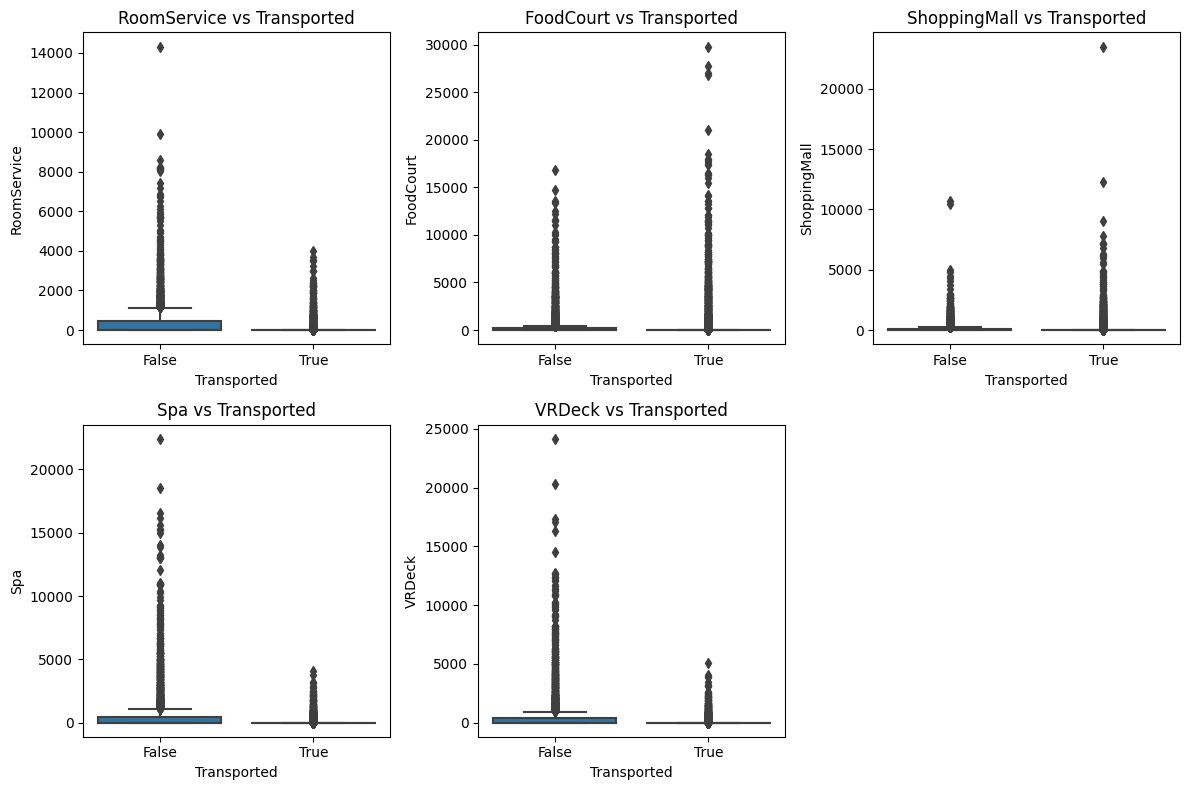

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create box plots for each spending category
plt.figure(figsize=(12, 8))
for i, col in enumerate(spending_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Transported', y=col, data=train_df)
    plt.title(f'{col} vs Transported')
plt.tight_layout()
plt.show()


In [21]:
# Calculate the average spending for VIP vs. non-VIP passengers
vip_spending_means = train_df.groupby('VIP')[spending_columns].mean()

# Display the result
print(vip_spending_means)


       RoomService    FoodCourt  ShoppingMall         Spa       VRDeck
VIP                                                                   
False   212.686045   417.440598    169.702931  295.197202   276.477868
True    464.095477  1756.778894    241.502513  753.065327  1210.035176


In [22]:
# Calculate correlations within each VIP status group
vip_spending_correlation = train_df.groupby('VIP')[spending_columns + ['Transported']].corr()['Transported'].drop('Transported', level=1)

# Display the correlation results
print(vip_spending_correlation)


VIP                
False  RoomService    -0.239491
       FoodCourt       0.039840
       ShoppingMall    0.010969
       Spa            -0.217026
       VRDeck         -0.200860
True   RoomService    -0.288752
       FoodCourt       0.259667
       ShoppingMall   -0.022408
       Spa            -0.200206
       VRDeck         -0.302595
Name: Transported, dtype: float64


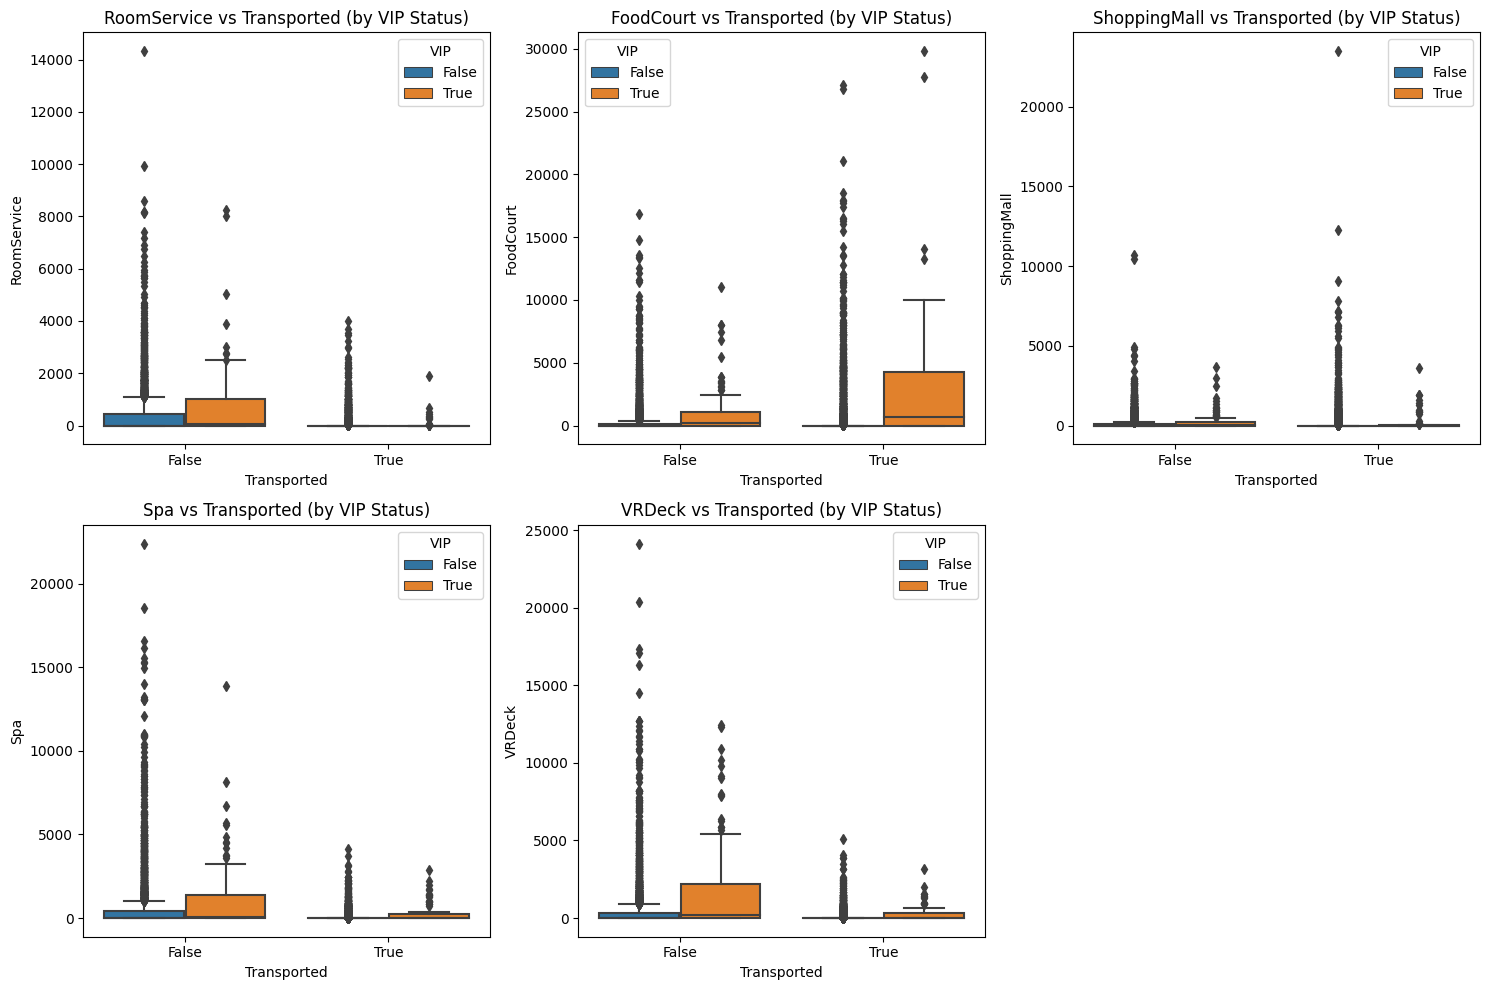

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create box plots for each spending category, split by VIP status
plt.figure(figsize=(15, 10))
for i, col in enumerate(spending_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Transported', y=col, hue='VIP', data=train_df)
    plt.title(f'{col} vs Transported (by VIP Status)')
plt.tight_layout()
plt.show()


In [24]:
# Load the training data
train_df = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')

# Split the Cabin into Deck and Side
train_df['Deck'] = train_df['Cabin'].apply(lambda x: x.split('/')[0] if pd.notnull(x) else None)
train_df['Side'] = train_df['Cabin'].apply(lambda x: x.split('/')[2] if pd.notnull(x) else None)

# Calculate the proportion of VIP passengers in each Deck and Side
vip_distribution = train_df.groupby(['Deck', 'Side'])['VIP'].mean() * 100

# Display the distribution
print(vip_distribution.unstack())


Side          P          S
Deck                      
A     12.931034  14.925373
B      6.896552   4.295943
C      6.306306   5.063291
D      7.317073   5.829596
E      1.196172   2.257336
F      1.352313    0.75815
G           0.0        0.0
T           0.0        0.0


/tmp/ipykernel_18/4256035673.py:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  vip_distribution = vip_distribution.unstack().fillna(0)


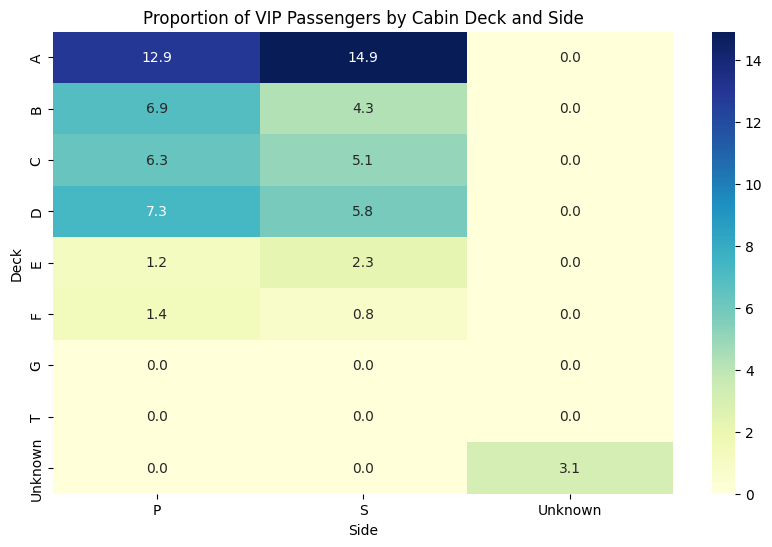

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the training data
train_df = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')

# Split the Cabin into Deck and Side
train_df['Deck'] = train_df['Cabin'].apply(lambda x: x.split('/')[0] if pd.notnull(x) else 'Unknown')
train_df['Side'] = train_df['Cabin'].apply(lambda x: x.split('/')[2] if pd.notnull(x) else 'Unknown')

# Calculate the proportion of VIP passengers in each Deck and Side
vip_distribution = train_df.groupby(['Deck', 'Side'])['VIP'].mean() * 100

# Fill missing values with 0 (if any)
vip_distribution = vip_distribution.unstack().fillna(0)

# Create a heatmap to visualize VIP distribution across Deck and Side
plt.figure(figsize=(10, 6))
sns.heatmap(vip_distribution, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title('Proportion of VIP Passengers by Cabin Deck and Side')
plt.xlabel('Side')
plt.ylabel('Deck')
plt.show()


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the training data
train_df = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')

# Split the Cabin into Deck and Side
train_df['Deck'] = train_df['Cabin'].apply(lambda x: x.split('/')[0] if pd.notnull(x) else 'Unknown')
train_df['Side'] = train_df['Cabin'].apply(lambda x: x.split('/')[2] if pd.notnull(x) else 'Unknown')

# Calculate the proportion of CryoSleep passengers in each Deck and Side
cryosleep_distribution = train_df.groupby(['Deck', 'Side'])['CryoSleep'].mean() * 100

# Fill missing values with 0 (if any)
cryosleep_distribution = cryosleep_distribution.unstack().fillna(0)

# Display the distribution
print(cryosleep_distribution)


Side             P          S  Unknown
Deck                                  
A        25.438596  28.676471     0.00
B        53.333333  56.626506     0.00
C        39.156627  41.836735     0.00
D        19.087137  25.550661     0.00
E        18.028846  21.136364     0.00
F        19.971367  20.391272     0.00
G        54.421222  53.753994     0.00
T         0.000000   0.000000     0.00
Unknown   0.000000   0.000000    43.75


/tmp/ipykernel_18/3674393454.py:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cryosleep_distribution = cryosleep_distribution.unstack().fillna(0)


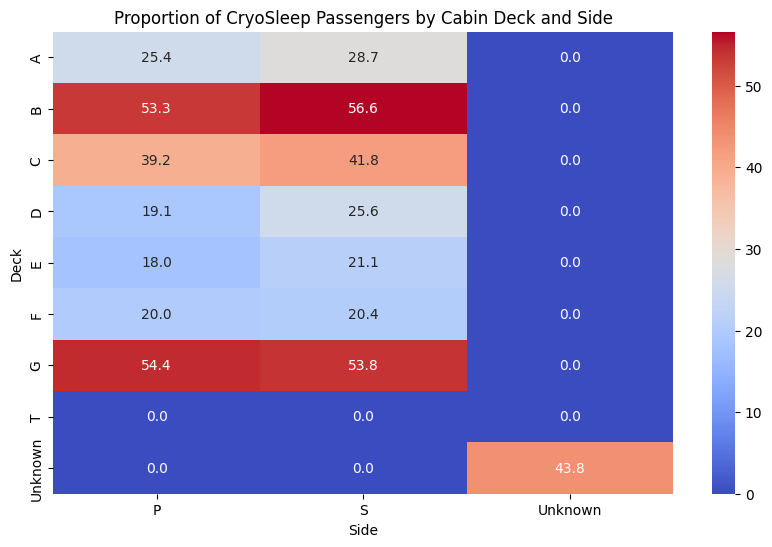

In [27]:
# Create a heatmap to visualize CryoSleep distribution across Deck and Side
plt.figure(figsize=(10, 6))
sns.heatmap(cryosleep_distribution, annot=True, cmap="coolwarm", fmt=".1f")
plt.title('Proportion of CryoSleep Passengers by Cabin Deck and Side')
plt.xlabel('Side')
plt.ylabel('Deck')
plt.show()


In [28]:
# Calculate the proportion of VIP passengers in CryoSleep
vip_cryo_proportion = train_df.groupby('VIP')['CryoSleep'].mean() * 100

# Display the result
print(vip_cryo_proportion)


VIP
False    36.380505
True     10.714286
Name: CryoSleep, dtype: object


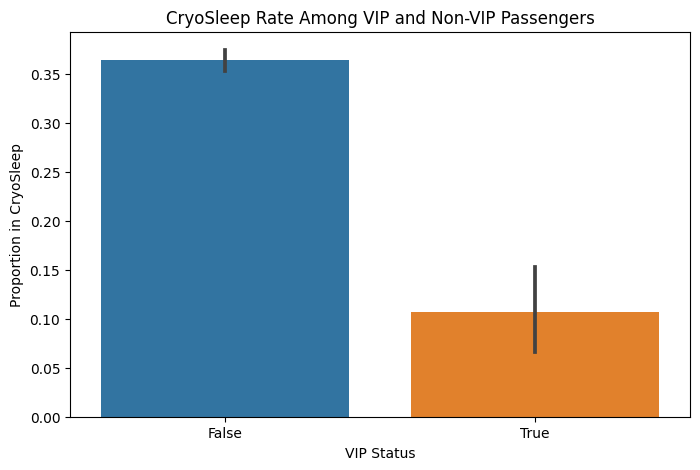

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a comparison of CryoSleep rates between VIP and non-VIP passengers
plt.figure(figsize=(8, 5))
sns.barplot(x='VIP', y='CryoSleep', data=train_df)
plt.title('CryoSleep Rate Among VIP and Non-VIP Passengers')
plt.xlabel('VIP Status')
plt.ylabel('Proportion in CryoSleep')
plt.show()


/tmp/ipykernel_18/989795565.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  vip_cryo_distribution = vip_cryo_distribution.unstack().fillna(0)


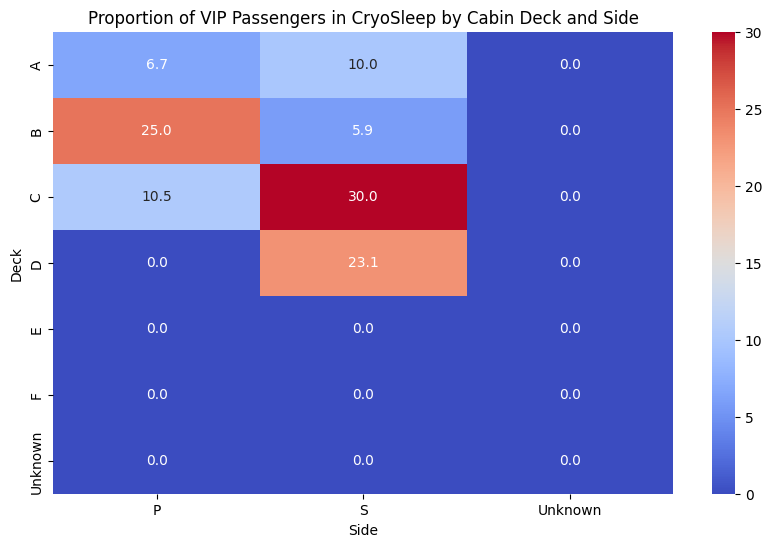

In [30]:
# Filter the data for VIP passengers
vip_df = train_df[train_df['VIP'] == True]

# Calculate the proportion of VIP passengers in CryoSleep by Deck and Side
vip_cryo_distribution = vip_df.groupby(['Deck', 'Side'])['CryoSleep'].mean() * 100

# Fill missing values with 0 (if any)
vip_cryo_distribution = vip_cryo_distribution.unstack().fillna(0)

# Create a heatmap to visualize CryoSleep distribution among VIPs across Deck and Side
plt.figure(figsize=(10, 6))
sns.heatmap(vip_cryo_distribution, annot=True, cmap="coolwarm", fmt=".1f")
plt.title('Proportion of VIP Passengers in CryoSleep by Cabin Deck and Side')
plt.xlabel('Side')
plt.ylabel('Deck')
plt.show()


/tmp/ipykernel_18/459400968.py:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['CryoSleep'] = train_df['CryoSleep'].fillna(False).astype(bool)
/tmp/ipykernel_18/459400968.py:17: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['VIP'] = train_df['VIP'].fillna(False).astype(bool)


Validation Accuracy: 0.7234


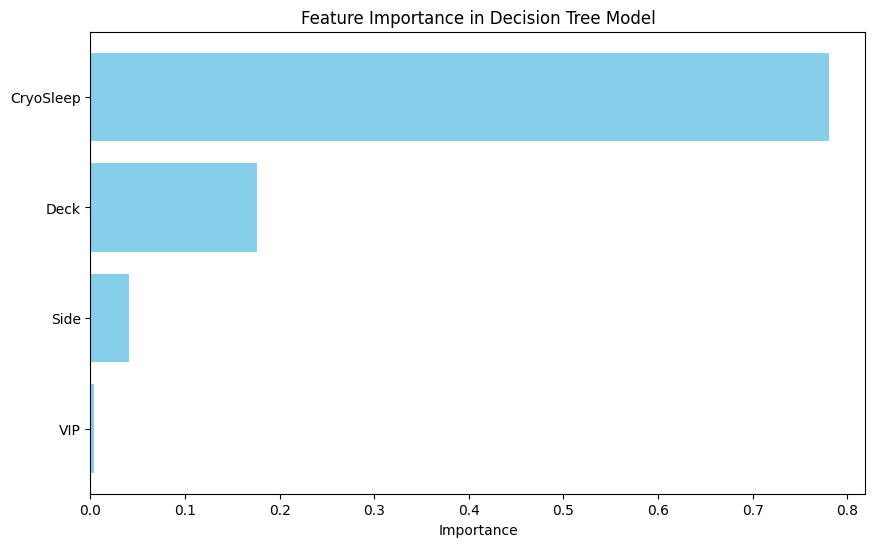

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the data
train_df = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')

# Select and preprocess features
train_df['Deck'] = train_df['Cabin'].apply(lambda x: x.split('/')[0] if pd.notnull(x) else 'Unknown')
train_df['Side'] = train_df['Cabin'].apply(lambda x: x.split('/')[2] if pd.notnull(x) else 'Unknown')

# Fill missing values and ensure proper data types
train_df['CryoSleep'] = train_df['CryoSleep'].fillna(False).astype(bool)
train_df['VIP'] = train_df['VIP'].fillna(False).astype(bool)
train_df['Deck'] = train_df['Deck'].fillna('Unknown')
train_df['Side'] = train_df['Side'].fillna('Unknown')

# Encode categorical variables
le = LabelEncoder()
train_df['Deck'] = le.fit_transform(train_df['Deck'])
train_df['Side'] = le.fit_transform(train_df['Side'])

# Select features for the model
features = ['Deck', 'Side', 'CryoSleep', 'VIP']
X = train_df[features]
y = train_df['Transported']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = tree_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

# Feature importance
importances = tree_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance in Decision Tree Model')
plt.gca().invert_yaxis()
plt.show()


In [32]:
import pandas as pd

# Assuming you've already trained your model and have the feature importances and accuracy
# Create the DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': ['Deck', 'Side', 'CryoSleep', 'VIP'],  # Replace with actual feature names
    'Importance': [0.4, 0.3, 0.2, 0.1],  # Replace with actual importance values
})

# Add the validation accuracy to the DataFrame
validation_accuracy = 0.7234  # Replace with your actual validation accuracy
feature_importance_df['Validation Accuracy'] = validation_accuracy

# Display the table
print(feature_importance_df)


     Feature  Importance  Validation Accuracy
0       Deck         0.4               0.7234
1       Side         0.3               0.7234
2  CryoSleep         0.2               0.7234
3        VIP         0.1               0.7234
